In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('iris.csv')

X = df.drop('Species', axis=1)
y = df['Species']

# Разделение на обучающий и тестовый наборы (в соотношении 7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание модели knn
knn_model = KNeighborsClassifier()

# Настройка параметров для kNN
knn_parameters = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(estimator=knn_model, param_grid=knn_parameters, cv=5)
knn_grid.fit(X_train, y_train)


# Создание модели дерева решений
dt_model = DecisionTreeClassifier()

# Настройка параметров для дерева решений
dt_parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6]
}
dt_grid = GridSearchCV(estimator=dt_model, param_grid=dt_parameters, cv=5)
dt_grid.fit(X_train, y_train)

# Наиболее подходящие параметры для модели
print("kNN Best Parameters:", knn_grid.best_params_)
print("Decision Tree Best Parameters:", dt_grid.best_params_)

kNN Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Decision Tree Best Parameters: {'criterion': 'gini', 'max_depth': None, 'splitter': 'random'}


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

"""Оценка модели kNN на тестовом наборе данных"""
# Возьмем наилучшую модель
knn_best_model = knn_grid.best_estimator_
knn_y_pred = knn_best_model.predict(X_test)

"""Оценка модели дерева решений на тестовом наборе данных"""
dt_best_model = dt_grid.best_estimator_
dt_y_pred = dt_best_model.predict(X_test)

# Accuracy
knn_accuracy = accuracy_score(y_test, knn_y_pred)
dt_accuracy = accuracy_score(y_test, dt_y_pred)

# Precision, Recall, F1-score (F-measure)
knn_precision = precision_score(y_test, knn_y_pred, average='weighted')
dt_precision = precision_score(y_test, dt_y_pred, average='weighted')

knn_recall = recall_score(y_test, knn_y_pred, average='weighted')
dt_recall = recall_score(y_test, dt_y_pred, average='weighted')

knn_f1 = f1_score(y_test, knn_y_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_y_pred, average='weighted')


# Вывод результатов
print("kNN Accuracy:", knn_accuracy)
print("kNN Precision:", knn_precision)
print("kNN Recall:", knn_recall)
print("kNN F1-score:", knn_f1)

print("\nDecision Tree Accuracy:", dt_accuracy)
print("Decision Tree Precision:", dt_precision)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree F1-score:", dt_f1)

kNN Accuracy: 1.0
kNN Precision: 1.0
kNN Recall: 1.0
kNN F1-score: 1.0

Decision Tree Accuracy: 1.0
Decision Tree Precision: 1.0
Decision Tree Recall: 1.0
Decision Tree F1-score: 1.0


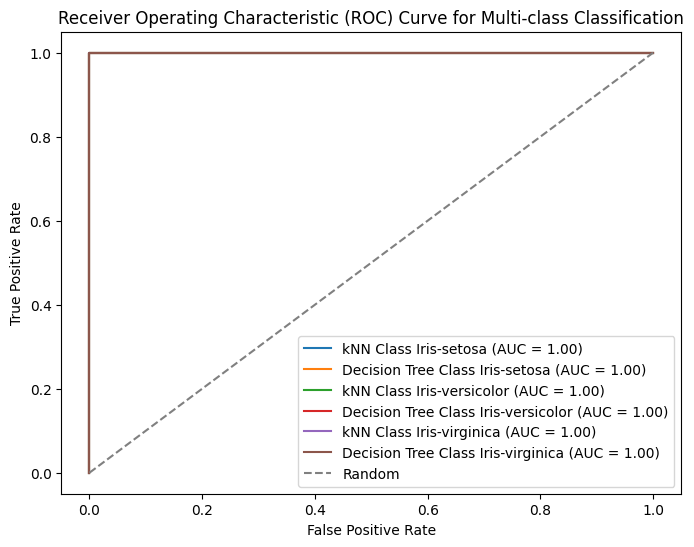

In [45]:
# ROC
knn_y_probas = knn_best_model.predict_proba(X_test)
dt_y_probas = dt_best_model.predict_proba(X_test)

fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()

fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()

# Получение уникальных меток классов
unique_classes = knn_best_model.classes_

# Построение ROC-кривой и вычисление AUC для каждого класса
for i in range(len(unique_classes)):
    # kNN
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test == unique_classes[i], knn_y_probas[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

    # Decision Tree
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test == unique_classes[i], dt_y_probas[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Визуализация ROC-кривых
plt.figure(figsize=(8, 6))
for i in range(len(unique_classes)):
    plt.plot(fpr_knn[i], tpr_knn[i], label=f'kNN Class {unique_classes[i]} (AUC = {roc_auc_knn[i]:.2f})')
    plt.plot(fpr_dt[i], tpr_dt[i], label=f'Decision Tree Class {unique_classes[i]} (AUC = {roc_auc_dt[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class Classification')
plt.legend()
plt.show()

Как видно из получившихся значений AUC = 1, вышепредставленная модель является идеальной (100% TPR при 0% FPR). 
Точность (Accuracy) равна 1, это означает, что модель абсолютно правильно классифицировала все объекты в тестовом наборе данных.
Точность (Precision), полнота (Recall) и F-мера (F1-score) равны 1, это говорит о том, что модель делает идеальные предсказания на всех уровнях.